In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

data = pd.read_csv("/content/Bank_churn.csv")

In [2]:
data.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
5%,500.95000,1.557882e+07,489.000000,25.000000,1.000000,0.000000,1.000000,0.00000,0.000000,9851.818500,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
90%,9000.10000,1.579083e+07,778.000000,53.000000,9.000000,149244.792000,2.000000,1.00000,1.000000,179674.704000,1.000000
95%,9500.05000,1.580303e+07,812.000000,60.000000,9.000000,162711.669000,2.000000,1.00000,1.000000,190155.375500,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.columns.values

array(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'churn'], dtype=object)

In [7]:
# categorical Variables
categorical_variables = [col for col in data.columns if col in "O"
                        or data[col].nunique() <=11
                        and col not in "churn"]

categorical_variables

['geography',
 'gender',
 'tenure',
 'numofproducts',
 'hascrcard',
 'isactivemember']

In [8]:
# Numeric Variables
numeric_variables = [col for col in data.columns if data[col].dtype != "object"
                        and data[col].nunique() >11]
numeric_variables

['rownumber', 'customerid', 'creditscore', 'age', 'balance', 'estimatedsalary']

In [9]:
data["churn"].value_counts()

,count
churn,
0,7963
1,2037


<Axes: >

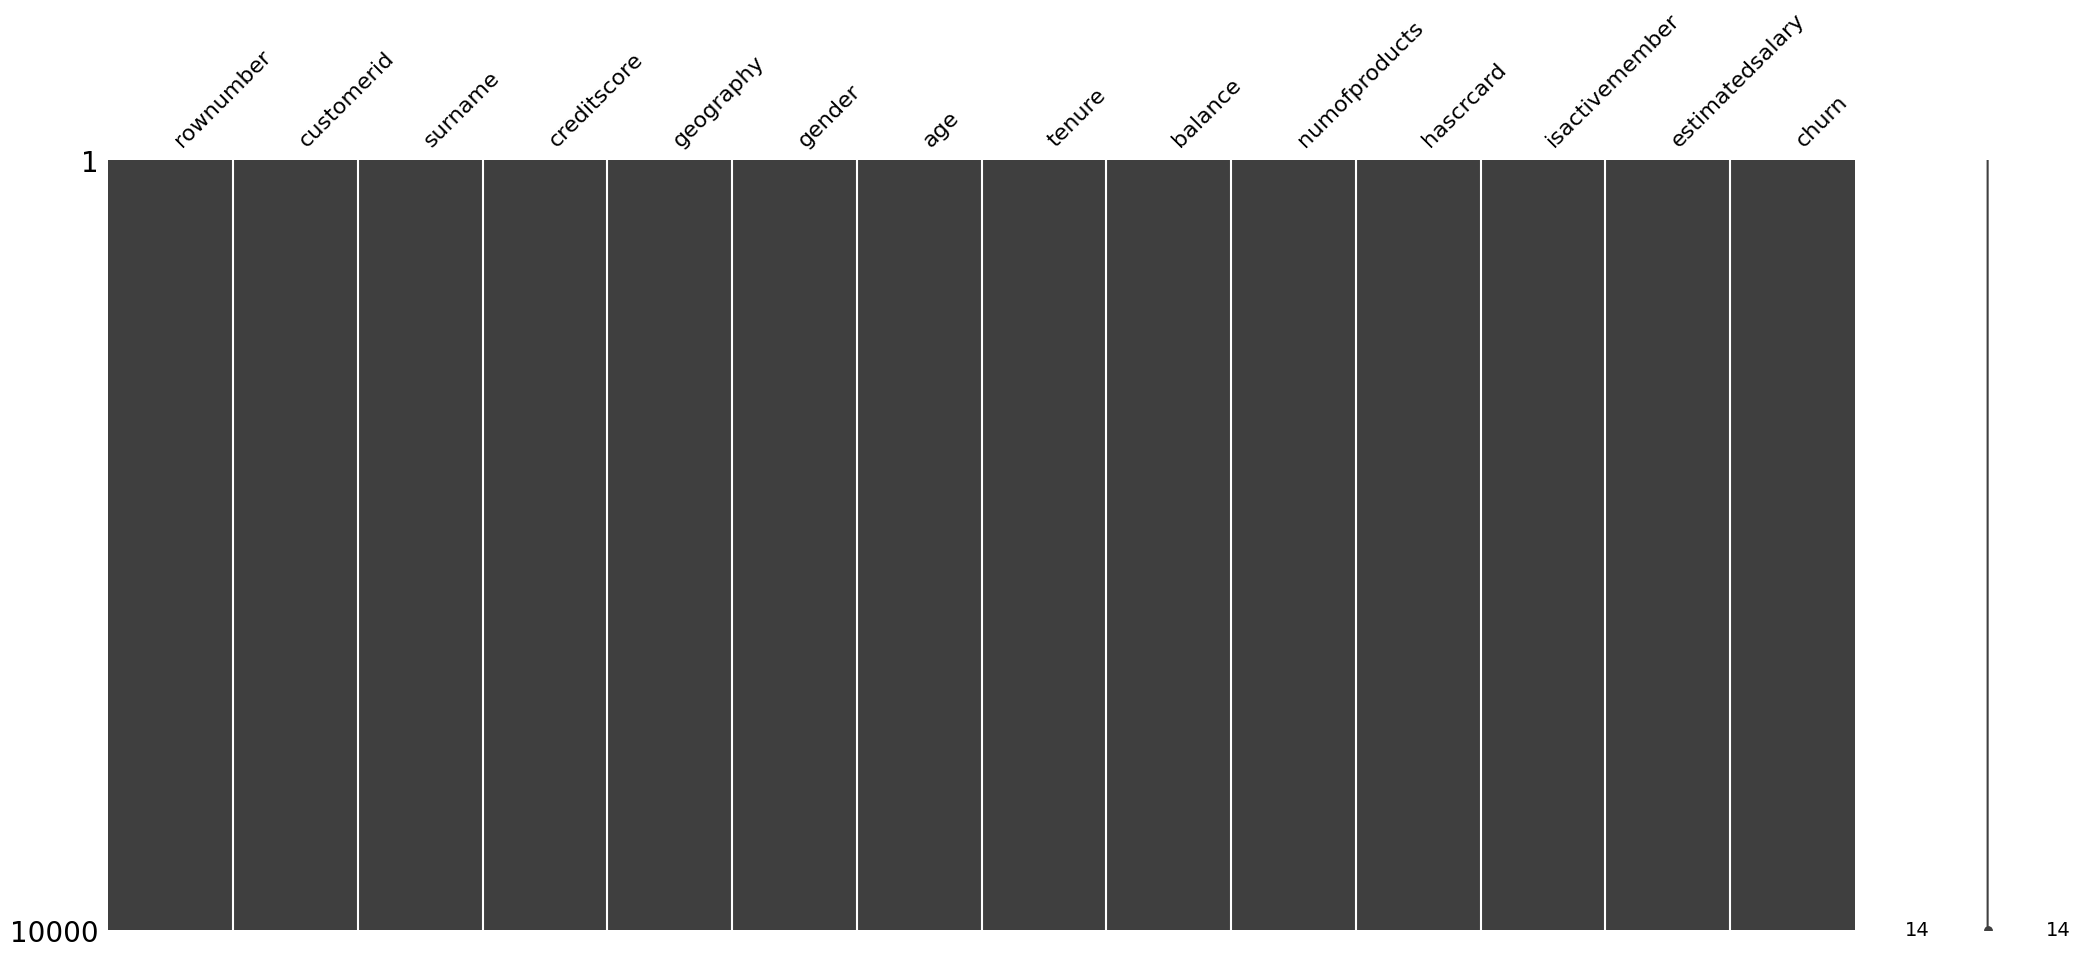

In [10]:
msno.matrix(data)

In [11]:
data.isnull().sum()

,0
rownumber,0
customerid,0
surname,0
creditscore,0
geography,0
gender,0
age,0
tenure,0
balance,0
numofproducts,0


In [12]:
# Get unique count for each variable
data.nunique()

,0
rownumber,10000
customerid,10000
surname,2932
creditscore,460
geography,3
gender,2
age,70
tenure,11
balance,6382
numofproducts,4


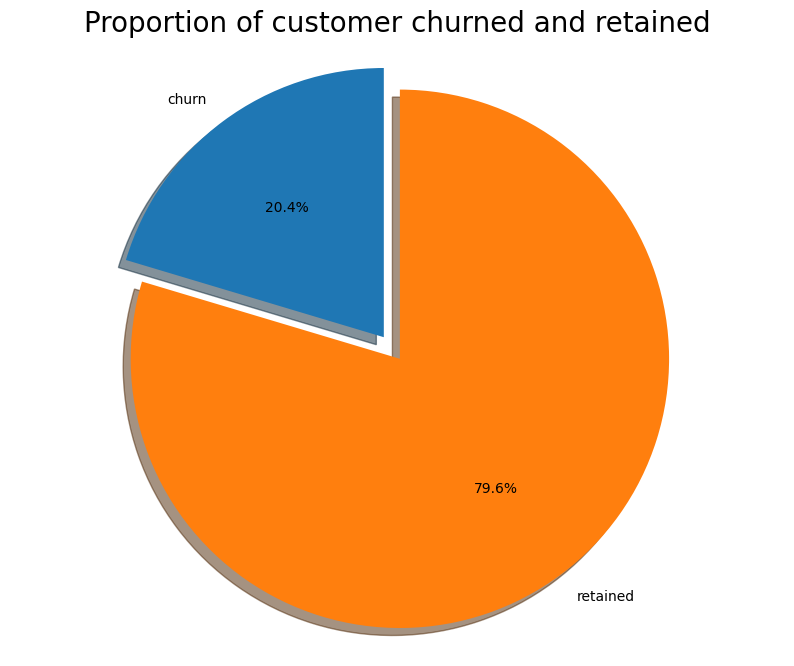

In [14]:
## EDA process

labels = 'churn', 'retained'
sizes = [data.churn[data['churn']==1].count(), data.churn[data['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()


<Axes: xlabel='isactivemember', ylabel='count'>

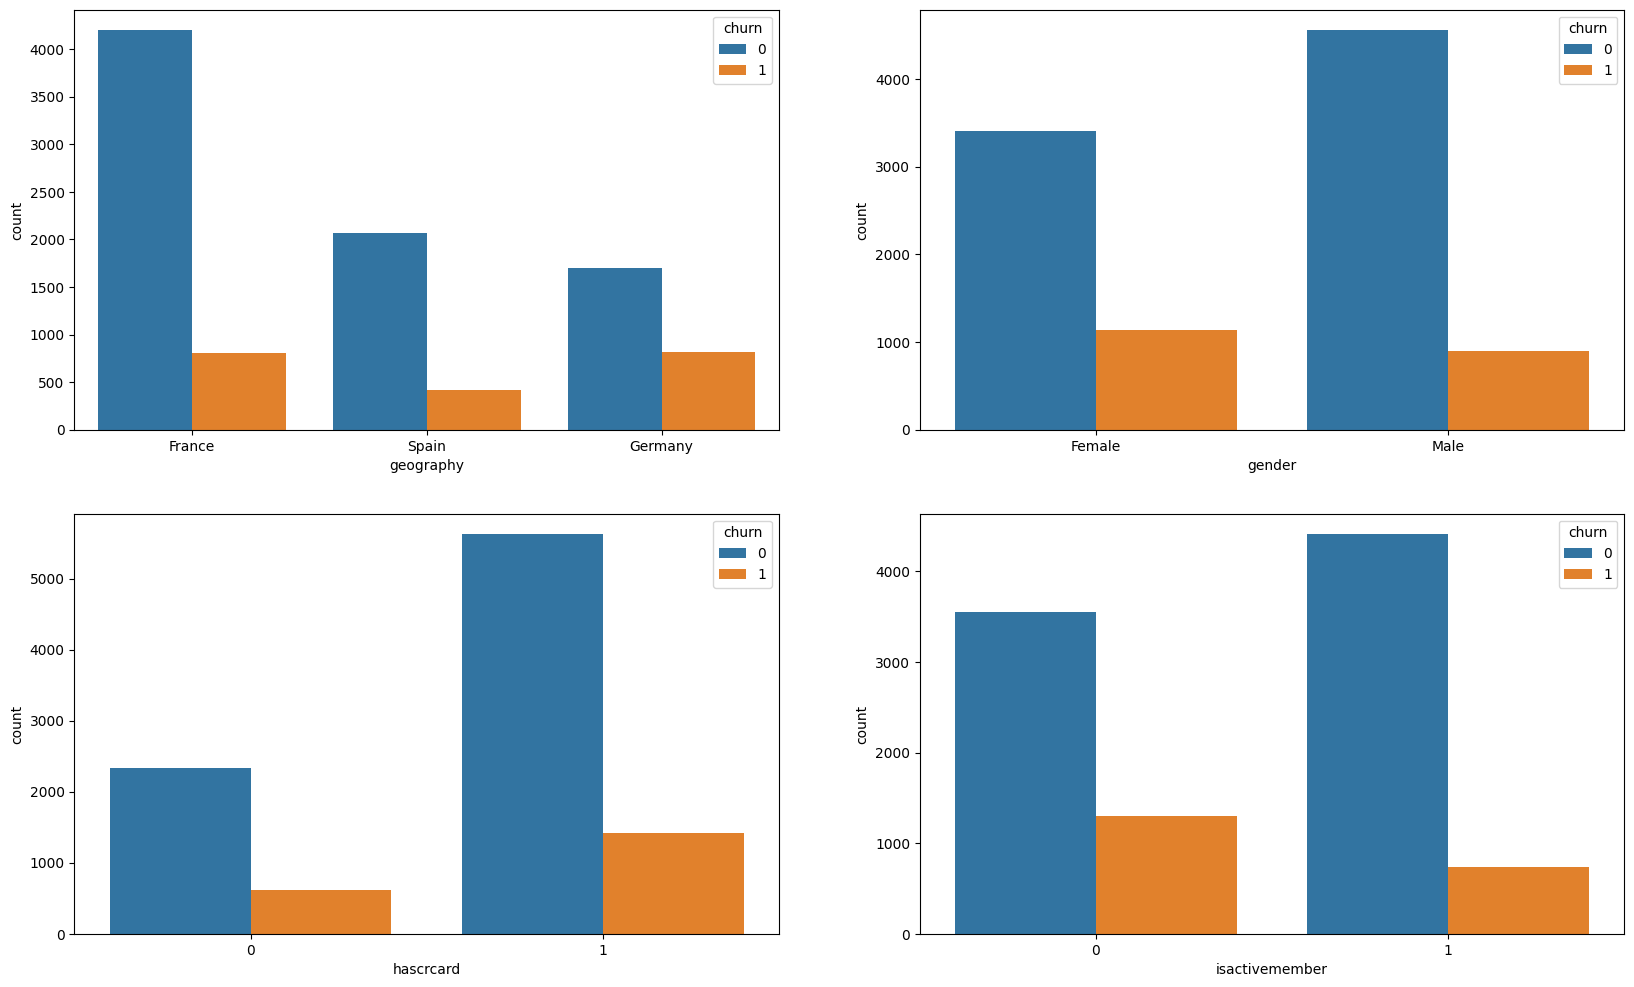

In [15]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='geography', hue = 'churn',data = data, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'churn',data = data, ax=axarr[0][1])
sns.countplot(x='hascrcard', hue = 'churn',data = data, ax=axarr[1][0])
sns.countplot(x='isactivemember', hue = 'churn',data = data, ax=axarr[1][1])

<Axes: xlabel='churn', ylabel='estimatedsalary'>

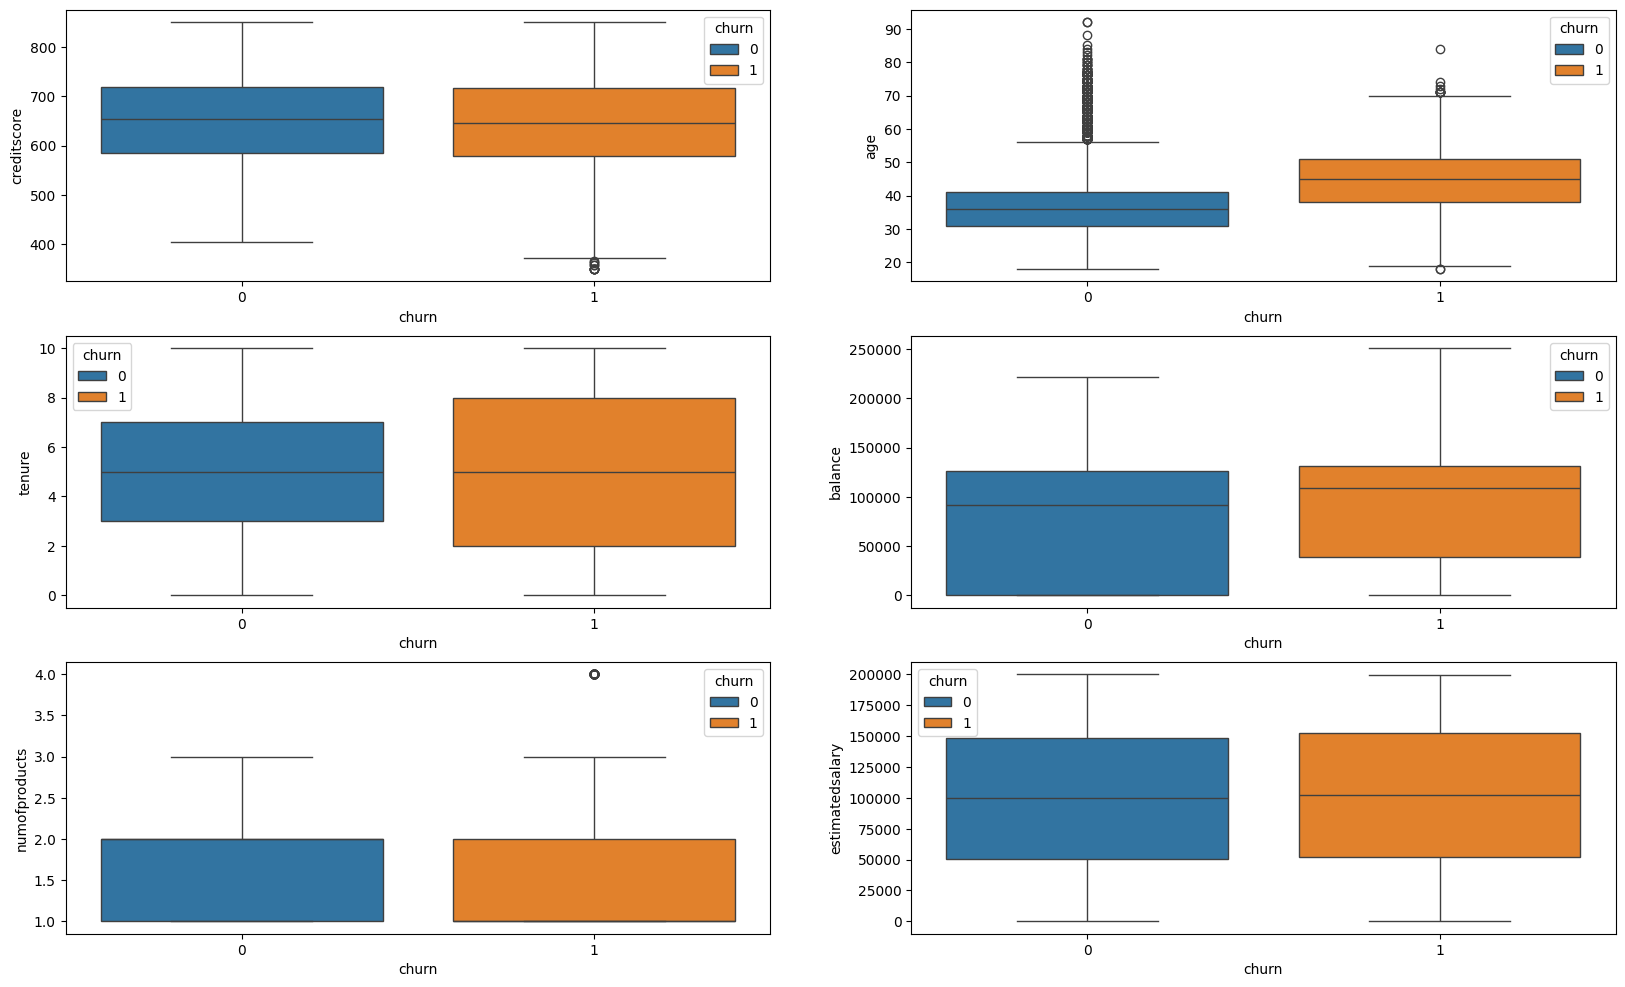

In [16]:
 # Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='creditscore',x = 'churn', hue = 'churn',data = data, ax=axarr[0][0])
sns.boxplot(y='age',x = 'churn', hue = 'churn',data = data , ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'churn', hue = 'churn',data = data, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'churn', hue = 'churn',data = data, ax=axarr[1][1])
sns.boxplot(y='numofproducts',x = 'churn', hue = 'churn',data = data, ax=axarr[2][0])
sns.boxplot(y='estimatedsalary',x = 'churn', hue = 'churn',data = data, ax=axarr[2][1])

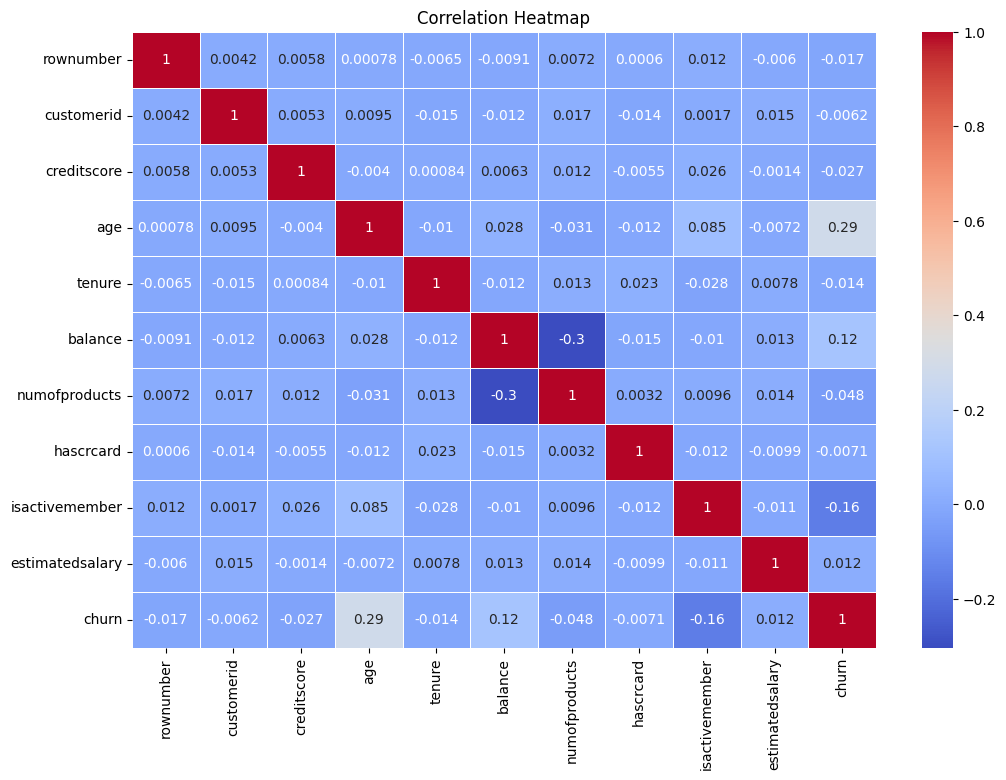

In [17]:
# Select only numeric columns
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix and heatmap for numeric columns only
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [18]:
X = data.drop(columns=["churn"])
y = data["churn"]

In [19]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Define preprocessing for numerical columns (impute missing values and scale)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical columns (impute missing and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Fit the preprocessor and transform the data
X_preprocessed = preprocessor.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [21]:
# Initialize and train RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

Accuracy: 0.8570
Precision: 0.8166
Recall: 0.3511
AUC-ROC: 0.6659


In [22]:
import shap
import numpy as np
import pandas as pd

def shap_global_explanation(model, X_train):
    # Ensure X_train is in a dense numeric format
    if isinstance(X_train, (pd.DataFrame, np.ndarray)):
        X_train_numeric = X_train
    else:
        X_train_numeric = X_train.toarray()  # Convert sparse to dense if needed

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_train_numeric)
    shap.summary_plot(shap_values[1], X_train_numeric)

In [23]:
def shap_local_explanation(model, X_instance):
    # Ensure X_instance is in a dense numeric format
    if isinstance(X_instance, (pd.DataFrame, np.ndarray)):
        X_instance_numeric = X_instance
    else:
        X_instance_numeric = X_instance.toarray()  # Convert sparse to dense if needed

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_instance_numeric)
    shap.force_plot(explainer.expected_value[1], shap_values[1], X_instance_numeric)

In [24]:
import lime.lime_tabular

def lime_local_explanation(model, X_train, X_instance):
    # Ensure X_train is in a dense numeric format
    if isinstance(X_train, (pd.DataFrame, np.ndarray)):
        X_train_numeric = X_train
    else:
        X_train_numeric = X_train.toarray()  # Convert sparse to dense if needed

    explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train_numeric,
        feature_names=X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train_numeric.shape[1])],
        class_names=['Not Churn', 'Churn'],
        discretize_continuous=True
    )
    explanation = explainer.explain_instance(X_instance, model.predict_proba)
    explanation.show_in_notebook()


In [25]:
from sklearn.tree import DecisionTreeClassifier

def surrogate_model_explanation(X_train, model_predictions):
    # Ensure X_train is in a dense numeric format
    if isinstance(X_train, (pd.DataFrame, np.ndarray)):
        X_train_numeric = X_train
    else:
        X_train_numeric = X_train.toarray()  # Convert sparse to dense if needed

    surrogate = DecisionTreeClassifier(max_depth=3)
    surrogate.fit(X_train_numeric, model_predictions)

    return surrogate